<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Assignment%201.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1.1 Advanced Reading: Machine Learning Tools, Process and Your Learnings

| || |
|---||---|
|Cu, Angelo Luis C.||8/12/2024|
|CPE 312 - CPE31S3||Dr. Alonica Villanueva|

**What is Overfitting and Underfitting**

Overfitting occurs when given a data, the model created *fits too much*, which results in a more complex model. The problem with this is that the model might work with the given dataset. But given a different data, the model has a higher chance to not work.

In the image below, it can be seen that the fit of degree 16 is high with an R2 of 0.97.

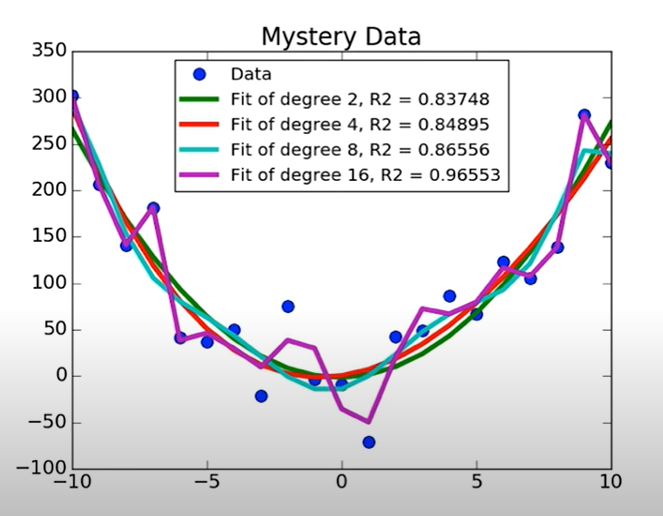


Underfitting occurs when given a data, the model created *does not fit well*, making the model unusable for predicting new data. It can be seen in the image below that the fit of degree 1 is low with an R2 value of 0.00049.

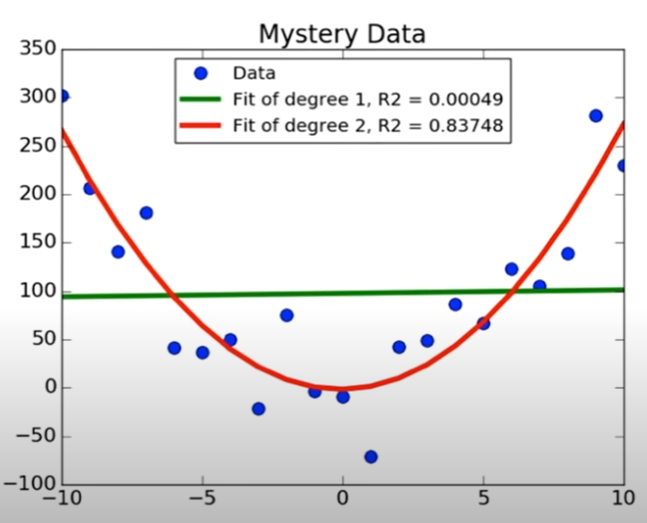

Source for both images: https://www.youtube.com/watch?v=vIFKGFl1Cn8&list=PLUl4u3cNGP619EG1wp0kT-7rDE_Az5TNd&index=9


**Define cross fold validation. How is it useful?**

Cross validation is the process of using another known data to test with the model to see whether the model is usable for different datasets and if it is accurate.

A way to do this is cross fold validation, where we instead split the existing data into a test and train values, where the amount of test value groups are the amount of folds.



**Demonstrate data splitting for training and testing data. Using any preprocessing library in Python on the iris dataset provided in the module.**

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
# Performs cross fold validation by splitting the data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# Checks the amount of train and test values
X_train.shape, X_test.shape
# There are 105 train values and 45 test values

((105, 4), (45, 4))

In [6]:
# Training a Logistic Regression Model using the TRAIN variables
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [7]:
# Predicting next results for TEST variables using the model
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [8]:
# Compares the model accuracy from predicted values using model with the actual test values
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
# Since the accuracy is close to 1, the model is highly accurate

Model accuracy score: 0.8889


In [9]:
# Checking for overfitting
# getting set scores

print('Training set score: {0:0.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {0:0.4f}'.format(logreg.score(X_test, y_test)))
# Since the set scores are close, there is less probability of overfitting

Training set score: 0.9429
Test set score: 0.8889


In [10]:
# Getting the cross validation score
# Gets the 4-Fold Cross Validation score
scores = cross_val_score(logreg, X_train, y_train, cv=4, scoring='accuracy').mean()
print('Cross-validation score: {:.4f}'.format(scores))
# The result is higher than 0.9, which suggest high accuracy

Cross-validation score: 0.9430


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Provide a sample confusion matrix and demonstrate the computation of TP, FP, FN, TN. How can we derive accuracy of the model based on the previously mentioned metrics?**

In [11]:
# as the iris dataset contains 3 variables, and a confusion matrix only works for 2 variables, I decided to delete rows with iris-setosa
# converts the X and y into a pandas dataframe
iris_df = pd.concat([X, y], axis = 1)
iris_df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris_df = iris_df[iris_df['class'] != 'Iris-setosa']
iris_df

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# separating the dataframe back to X and y
X = iris_df.drop(['class'], axis=1)
y = iris_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Training the model again
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

# Predicting next results for TEST variables using the model
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [15]:
# Creating an displaying a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[13  2]
 [ 0 15]]

True Positives(TP) =  13

True Negatives(TN) =  15

False Positives(FP) =  2

False Negatives(FN) =  0


<Axes: >

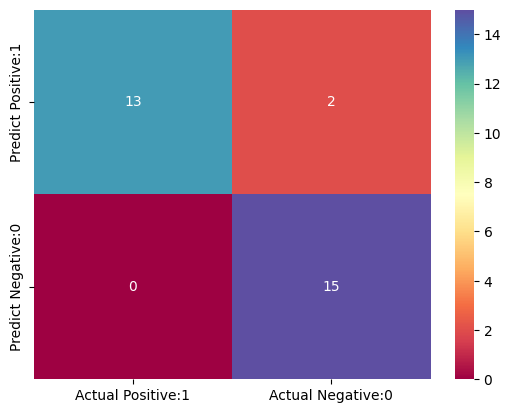

In [16]:
# Visualizing the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

In [17]:
# Gets the classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {:.4f}'.format(classification_accuracy))

Classification accuracy: 0.9333


In [18]:
# Gets Misclassification rate
misclassification_rate = (FP + FN) / float(TP + TN + FP + FN)
print('Misclassification rate: {:.4f}'.format(misclassification_rate))
# It can be seen that the classification accuracy is high while the error is low

Classification error: 0.0667


In [19]:
# Gets precision score
precision = TP / float(TP + FP)
print('Precision: {:.4f}'.format(precision))
# The result is a high precision score

Precision: 0.8667


In [20]:
# Gets Recall rate
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {:.4f}'.format(recall))

Recall or Sensitivity: 1.0000


In [21]:
# Gets False Positive rate
false_positive_rate = FP / float(FP+TN)
print('False Positive: {:.4f}'.format(false_positive_rate))

False Positive: 0.1176


In [22]:
# Gets Specificity rate
specificity = TN / (TN + FP)
print('Specificity: {:.4f}'.format(specificity))

Specificity: 0.8824


In [23]:
# Creates a classification report
print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



The confusion matrix, together with its metrics, is important in testing the accuracy of the model created, as it shows whether the model's predicted data and the actual data match with each other. The accompanying metrics of the confusion matrix are helpful as they provide a quantifiable way to decide whether our model is accurate.